# Togo EDA Notebook Template
# File: notebooks/togo_eda.ipynb
# -----------------------------------------------
# Step 1: Import libraries
# -----------------------------------------------

In [34]:
import sys
print(f"Python executable path: {sys.executable}")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  
import matplotlib
import scipy
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"SciPy version: {scipy.__version__}")


Python executable path: c:\Users\ADMIN\Desktop\KALEB\10Academy\Week0\solar-challenge-week0\venv\Scripts\python.exe
Pandas version: 2.3.3
Numpy version: 2.3.4
Matplotlib version: 3.10.7
Seaborn version: 0.13.2
SciPy version: 1.16.3


# Optional: Inline plotting for Jupyter

In [35]:
%matplotlib inline

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


# ----------------------------------
# Step 2: Load dataset
# ----------------------------------

In [36]:
file_path = "../data/togo-dapaong_qc.csv"  # your dataset path

try:
    df = pd.read_csv(file_path, parse_dates=['Timestamp'], index_col='Timestamp')
    print(f"Step 2: CSV loaded successfully. Shape: {df.shape} ✅")
    print("First 5 rows of the dataset:")
    display(df.head())
except Exception as e:
    print(f"Step 2: Failed to load CSV. Error: {e}")


Step 2: CSV loaded successfully. Shape: (525600, 18) ✅
First 5 rows of the dataset:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


# ----------------------------------------------------------
# Step 3: Summary Statistics & Missing Values Report
# ----------------------------------------------------------

In [37]:
try:
    # Summary statistics for numeric columns
    numeric_summary = df.describe()
    print("Step 3a: Summary statistics for numeric columns computed ✅")
    display(numeric_summary)

    # Count missing values per column
    missing_counts = df.isna().sum()
    print("Step 3b: Missing values per column computed ✅")
    display(missing_counts)

    # Columns with >5% missing values
    missing_percent = (missing_counts / len(df)) * 100
    cols_over_5pct = missing_percent[missing_percent > 5].index.tolist()
    print(f"Step 3c: Columns with >5% missing values: {cols_over_5pct} ✅")

except Exception as e:
    print(f"Step 3: Failed. Error: {e}")


Step 3a: Summary statistics for numeric columns computed ✅


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


Step 3b: Missing values per column computed ✅


GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Step 3c: Columns with >5% missing values: ['Comments'] ✅


# ---------------------------------------------------
# Step 4 is Outlier Detection & Basic Cleaning
# ---------------------------------------------------

# 4a: Columns where negative values are not possible

In [38]:
cols_no_neg = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
print("Step 4a: Columns where negative values are not possible identified ✅")

Step 4a: Columns where negative values are not possible identified ✅


# 4b: Replace negative values with NaN

In [39]:
for col in cols_no_neg:
    negative_count = (df[col] < 0).sum()
    df.loc[df[col] < 0, col] = np.nan
    print(f"{col}: {negative_count} negative values set to NaN ✅")

GHI: 257385 negative values set to NaN ✅
DNI: 0 negative values set to NaN ✅
DHI: 0 negative values set to NaN ✅
ModA: 0 negative values set to NaN ✅
ModB: 0 negative values set to NaN ✅
WS: 0 negative values set to NaN ✅
WSgust: 0 negative values set to NaN ✅


# 4c: Outlier detection using Z-score

In [40]:
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))
outlier_rows = (z_scores > 3).any(axis=1).sum()

print(f"Step 4: Outlier detection completed. Rows with Z>3: {outlier_rows} ✅")

Step 4: Outlier detection completed. Rows with Z>3: 9146 ✅


# -------------------------------------------------
# Step 5: Impute missing numeric values with median
# --------------------------------------------------

In [42]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Exclude 'Comments' if it's numeric (it has 100% NaN)
numeric_cols = [col for col in numeric_cols if col != 'Comments']

for col in numeric_cols:
    missing_before = df[col].isna().sum()
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)
    missing_after = df[col].isna().sum()
    print(f"{col}: {missing_before} missing values filled with median ({median_val}) ✅ Remaining missing: {missing_after}")

# Check remaining missing values in numeric columns
remaining_missing = df[numeric_cols].isna().sum().sum()
print(f"Step 5: Missing numeric values imputed. Total remaining missing: {remaining_missing} ✅")


GHI: 0 missing values filled with median (430.3) ✅ Remaining missing: 0
DNI: 0 missing values filled with median (0.0) ✅ Remaining missing: 0
DHI: 0 missing values filled with median (2.5) ✅ Remaining missing: 0
ModA: 0 missing values filled with median (4.4) ✅ Remaining missing: 0
ModB: 0 missing values filled with median (4.3) ✅ Remaining missing: 0
Tamb: 0 missing values filled with median (27.2) ✅ Remaining missing: 0
RH: 0 missing values filled with median (59.3) ✅ Remaining missing: 0
WS: 0 missing values filled with median (2.2) ✅ Remaining missing: 0
WSgust: 0 missing values filled with median (2.9) ✅ Remaining missing: 0
WSstdev: 0 missing values filled with median (0.5) ✅ Remaining missing: 0
WD: 0 missing values filled with median (199.1) ✅ Remaining missing: 0
WDstdev: 0 missing values filled with median (10.8) ✅ Remaining missing: 0
BP: 0 missing values filled with median (976.0) ✅ Remaining missing: 0
Cleaning: 0 missing values filled with median (0.0) ✅ Remaining missing

# -----------------------------------------------
# Step 6: Cleaning impact on ModA & ModB
# -----------------------------------------------

Average ModA & ModB by Cleaning flag:
                 ModA        ModB
Cleaning                        
0         225.979064  219.401351
1         535.186477  532.211744 ✅


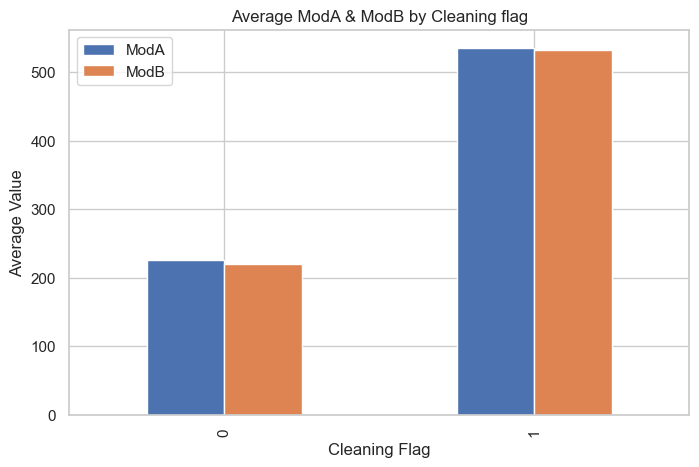

Step 6: Cleaning impact visualization completed ✅


In [43]:
# Group by 'Cleaning' flag
cleaning_group = df.groupby('Cleaning')[['ModA','ModB']].mean()
print("Average ModA & ModB by Cleaning flag:\n", cleaning_group, "✅")

# Plot average ModA & ModB by Cleaning flag
cleaning_group.plot(kind='bar', figsize=(8,5))
plt.title("Average ModA & ModB by Cleaning flag")
plt.ylabel("Average Value")
plt.xlabel("Cleaning Flag")
plt.show()
print("Step 6: Cleaning impact visualization completed ✅")


# --------------------------------
# Step 7: Time Series Analysis
# --------------------------------

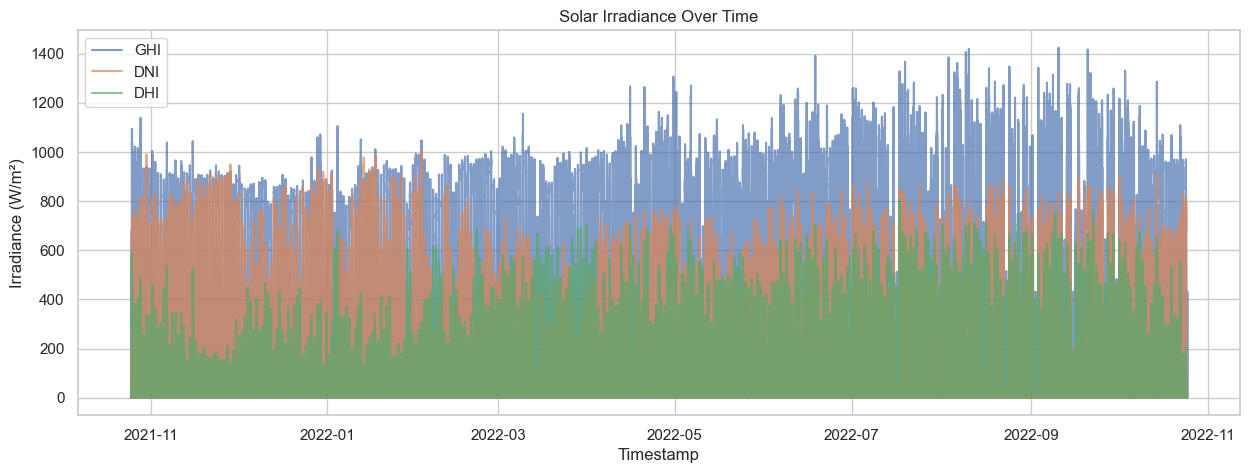

Step 7a: Solar irradiance time series plotted ✅


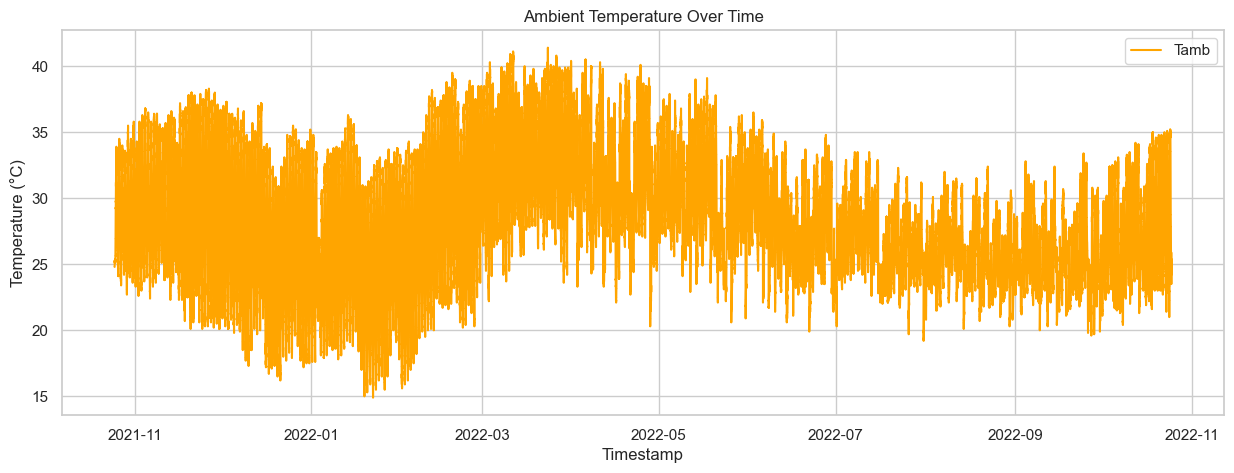

Step 7b: Temperature time series plotted ✅


In [44]:
# Step 7: Time Series Analysis
plt.figure(figsize=(15,5))
plt.plot(df.index, df['GHI'], label='GHI', alpha=0.7)
plt.plot(df.index, df['DNI'], label='DNI', alpha=0.7)
plt.plot(df.index, df['DHI'], label='DHI', alpha=0.7)
plt.title("Solar Irradiance Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Irradiance (W/m²)")
plt.legend()
plt.show()
print("Step 7a: Solar irradiance time series plotted ✅")

plt.figure(figsize=(15,5))
plt.plot(df.index, df['Tamb'], color='orange', label='Tamb')
plt.title("Ambient Temperature Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()
print("Step 7b: Temperature time series plotted ✅")


# Step 7 alternative: Numerical summary for time series patterns

In [45]:
# Daily averages
daily_avg = df.resample('D').mean()[['GHI','DNI','DHI','Tamb']]
print("Step 7a: Daily averages (first 5 days):")
print(daily_avg.head())
print("✅")

# Monthly averages
monthly_avg = df.resample('M').mean()[['GHI','DNI','DHI','Tamb']]
print("\nStep 7b: Monthly averages:")
print(monthly_avg)
print("✅")

# Daily min/max to check anomalies
daily_min_max = df.resample('D').agg({'GHI':['min','max'], 'DNI':['min','max'], 'DHI':['min','max'], 'Tamb':['min','max']})
print("\nStep 7c: Daily min/max (first 5 days):")
print(daily_min_max.head())
print("✅")


Step 7a: Daily averages (first 5 days):
                   GHI         DNI         DHI       Tamb
Timestamp                                                
2021-10-25  433.394371  112.296595  139.759833  28.405490
2021-10-26  479.968889  242.010556   98.657778  28.815833
2021-10-27  474.301806  221.792222  100.251389  28.194931
2021-10-28  467.904931  220.968264  104.538333  27.953542
2021-10-29  484.875625  274.342014   79.688333  28.337847
✅

Step 7b: Monthly averages:
                   GHI         DNI         DHI       Tamb
Timestamp                                                
2021-10-31  465.761097  209.892271  103.705913  28.432771
2021-11-30  467.719465  253.428850   75.008317  28.900421
2021-12-31  457.238293  213.932435   89.766243  26.293190
2022-01-31  463.206503  219.422166   90.369834  25.132681
2022-02-28  478.960131  172.229457  131.359266  28.268621
2022-03-31  467.587977  114.931635  157.590645  32.511519
2022-04-30  459.734530  143.576257  131.567965  30.888090
20

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16080\348967152.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M').mean()[['GHI','DNI','DHI','Tamb']]


# -----------------------------------------------
# Step 8: Correlation & Relationship Analysis
# -----------------------------------------------

Step 8a: Correlation matrix computed ✅

             GHI       DNI       DHI      ModA      ModB      Tamb        RH  \
GHI     1.000000  0.680150  0.513555  0.744567  0.744838  0.364756 -0.230310   
DNI     0.680150  1.000000  0.532717  0.889702  0.889708  0.504499 -0.327887   
DHI     0.513555  0.532717  1.000000  0.833037  0.832648  0.489758 -0.155016   
ModA    0.744567  0.889702  0.833037  1.000000  0.999564  0.561114 -0.287038   
ModB    0.744838  0.889708  0.832648  0.999564  1.000000  0.556133 -0.280072   
Tamb    0.364756  0.504499  0.489758  0.561114  0.556133  1.000000 -0.400410   
RH     -0.230310 -0.327887 -0.155016 -0.287038 -0.280072 -0.400410  1.000000   
WS      0.245493  0.366667  0.390597  0.420344  0.421543  0.197145 -0.147589   
WSgust  0.255833  0.384870  0.410531  0.442563  0.443570  0.221104 -0.131119   
BP      0.064847  0.047465  0.052307  0.064175  0.068740 -0.520770  0.225176   
TModA   0.605946  0.765881  0.802319  0.886888  0.885551  0.805580 -0.244825   


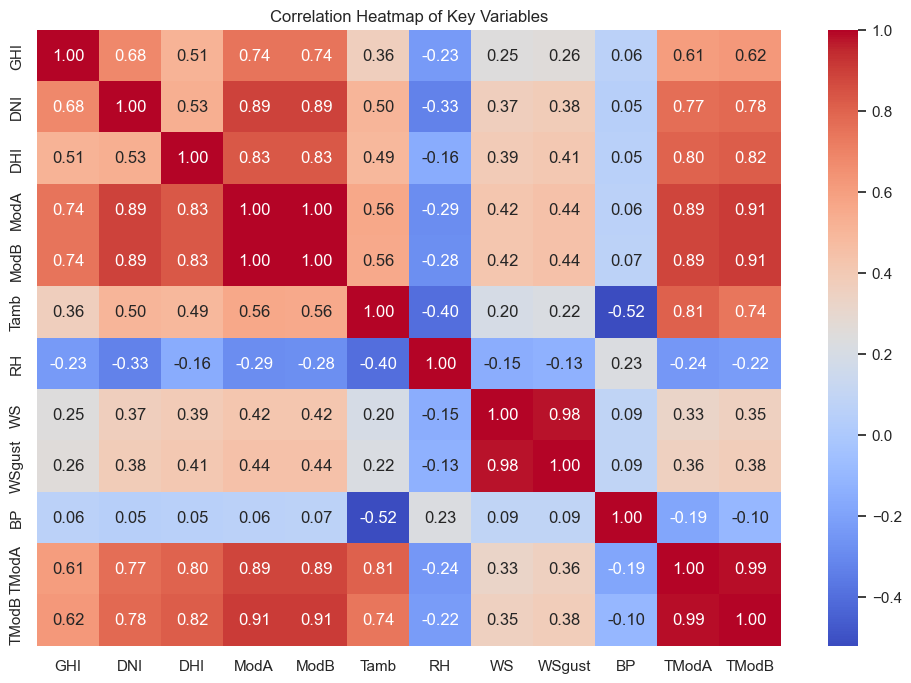

Step 8b: Correlation heatmap displayed ✅

Step 8c: Top correlated pairs (absolute correlation):
 ModA    ModB      0.999564
ModB    ModA      0.999564
TModA   TModB     0.985069
TModB   TModA     0.985069
WS      WSgust    0.977587
WSgust  WS        0.977587
ModA    TModB     0.906796
TModB   ModA      0.906796
        ModB      0.906427
ModB    TModB     0.906427
dtype: float64 

Step 8: Correlation analysis completed ✅


In [46]:
# Select relevant numeric columns for correlation
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'BP', 'TModA', 'TModB']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

print("Step 8a: Correlation matrix computed ✅\n")
print(corr_matrix, "\n")

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Key Variables")
plt.show()
print("Step 8b: Correlation heatmap displayed ✅\n")

# Optional: Top correlations (absolute, excluding self-correlation)
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs != 1].sort_values(key=abs, ascending=False)
print("Step 8c: Top correlated pairs (absolute correlation):\n", corr_pairs.head(10), "\n")
print("Step 8: Correlation analysis completed ✅")


# -----------------------------------------------
# Step 9: Time Series Visualization & Trends
# -----------------------------------------------

Step 9a: Daily averages (first 5 days):
                    GHI         DNI         DHI       Tamb
Timestamp                                                
2021-10-25  433.394371  112.296595  139.759833  28.405490
2021-10-26  479.968889  242.010556   98.657778  28.815833
2021-10-27  474.301806  221.792222  100.251389  28.194931
2021-10-28  467.904931  220.968264  104.538333  27.953542
2021-10-29  484.875625  274.342014   79.688333  28.337847 ✅

Step 9a: Monthly averages:
                    GHI         DNI         DHI       Tamb
Timestamp                                                
2021-10-31  465.761097  209.892271  103.705913  28.432771
2021-11-30  467.719465  253.428850   75.008317  28.900421
2021-12-31  457.238293  213.932435   89.766243  26.293190
2022-01-31  463.206503  219.422166   90.369834  25.132681
2022-02-28  478.960131  172.229457  131.359266  28.268621 ✅



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16080\3122724169.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M').mean()[['GHI','DNI','DHI','Tamb']]


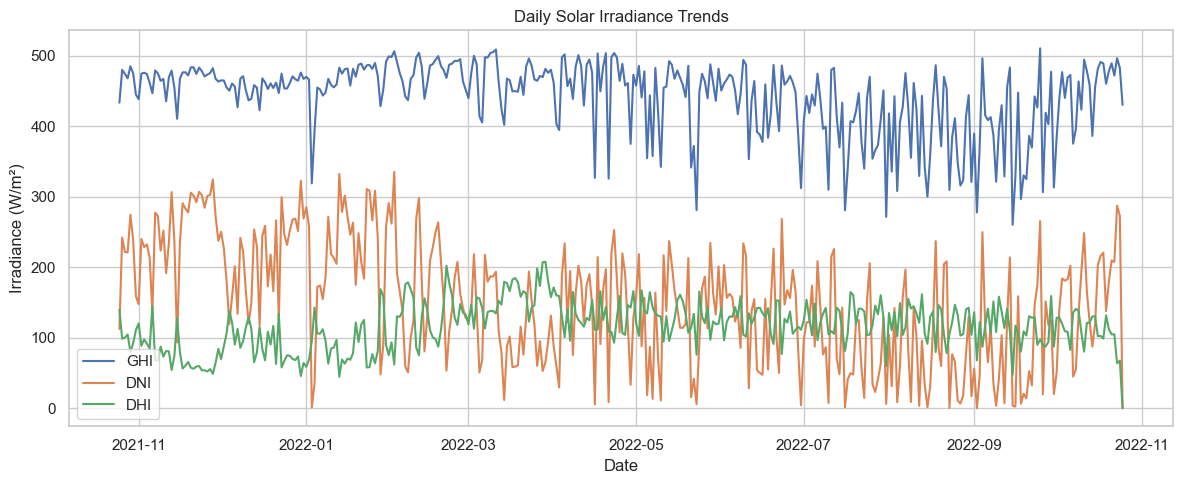

Step 9b: Daily min/max (first 5 days):
             GHI_min  DNI_min  DHI_min  Tamb_min  GHI_max  DNI_max  DHI_max  \
Timestamp                                                                    
2021-10-25      0.0      0.0      0.0      24.8   1094.0    728.8    585.3   
2021-10-26      0.2      0.0      0.0      24.1   1021.0    763.2    382.8   
2021-10-27      0.0      0.0      0.0      23.4   1016.0    743.0    403.4   
2021-10-28      0.2      0.0      0.0      24.2   1139.0    813.1    486.3   
2021-10-29      0.1      0.0      0.0      22.7    933.0    815.7    256.3   

            Tamb_max  
Timestamp             
2021-10-25      33.9  
2021-10-26      34.5  
2021-10-27      34.0  
2021-10-28      33.6  
2021-10-29      35.5   ✅



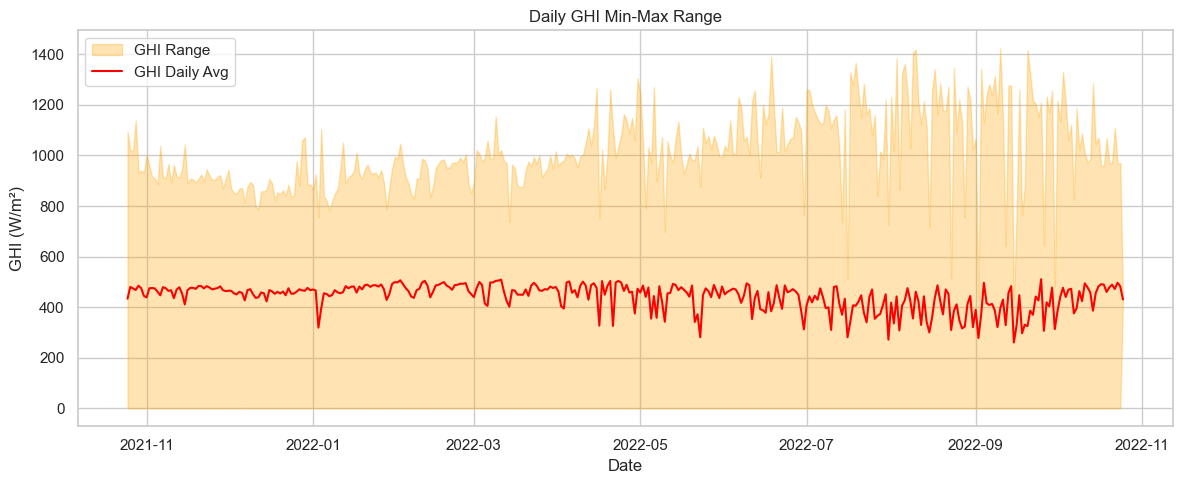

In [47]:
df.index = pd.to_datetime(df.index)

# -----------------------------
# Step 9a: Daily Averages
# -----------------------------
daily_avg = df.resample('D').mean()[['GHI','DNI','DHI','Tamb']]
print("Step 9a: Daily averages (first 5 days):\n", daily_avg.head(), "✅\n")

# Step 9a: Monthly Averages
monthly_avg = df.resample('M').mean()[['GHI','DNI','DHI','Tamb']]
print("Step 9a: Monthly averages:\n", monthly_avg.head(), "✅\n")

# Optional: Plot daily trends
plt.figure(figsize=(12,5))
plt.plot(daily_avg.index, daily_avg['GHI'], label='GHI')
plt.plot(daily_avg.index, daily_avg['DNI'], label='DNI')
plt.plot(daily_avg.index, daily_avg['DHI'], label='DHI')
plt.title('Daily Solar Irradiance Trends')
plt.xlabel('Date')
plt.ylabel('Irradiance (W/m²)')
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# Step 9b: Daily Min/Max
# -----------------------------
daily_min = df.resample('D').min()[['GHI','DNI','DHI','Tamb']]
daily_max = df.resample('D').max()[['GHI','DNI','DHI','Tamb']]
daily_minmax = pd.concat([daily_min.add_suffix('_min'), daily_max.add_suffix('_max')], axis=1)
print("Step 9b: Daily min/max (first 5 days):\n", daily_minmax.head(), "✅\n")

# Optional: Plot daily min/max ranges for GHI
plt.figure(figsize=(12,5))
plt.fill_between(daily_minmax.index, daily_minmax['GHI_min'], daily_minmax['GHI_max'], color='orange', alpha=0.3, label='GHI Range')
plt.plot(daily_avg.index, daily_avg['GHI'], color='red', label='GHI Daily Avg')
plt.title('Daily GHI Min-Max Range')
plt.xlabel('Date')
plt.ylabel('GHI (W/m²)')
plt.legend()
plt.tight_layout()
plt.show()



# -----------------------------------------------
# Step 10: Feature engineering
# -----------------------------------------------

In [48]:
# Make sure Timestamp is a datetime index
df.index = pd.to_datetime(df.index)

# 1. Time-based features
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek  # Monday=0, Sunday=6
df['Month'] = df.index.month

# 2. Optional: Previous hour GHI (lag feature)
df['GHI_lag1'] = df['GHI'].shift(1)
df['DNI_lag1'] = df['DNI'].shift(1)
df['DHI_lag1'] = df['DHI'].shift(1)

# 3. Optional: 3-hour rolling average
df['GHI_roll3'] = df['GHI'].rolling(window=3).mean()
df['Tamb_roll3'] = df['Tamb'].rolling(window=3).mean()

print("Step 10: Feature engineering completed ✅")
print("New columns added:", df.columns[-8:].tolist())  # Show only the new columns


Step 10: Feature engineering completed ✅
New columns added: ['Hour', 'DayOfWeek', 'Month', 'GHI_lag1', 'DNI_lag1', 'DHI_lag1', 'GHI_roll3', 'Tamb_roll3']


# -----------------------------------------------
# Step 11: data visualization of the new features
# -----------------------------------------------

<Figure size 1400x600 with 0 Axes>

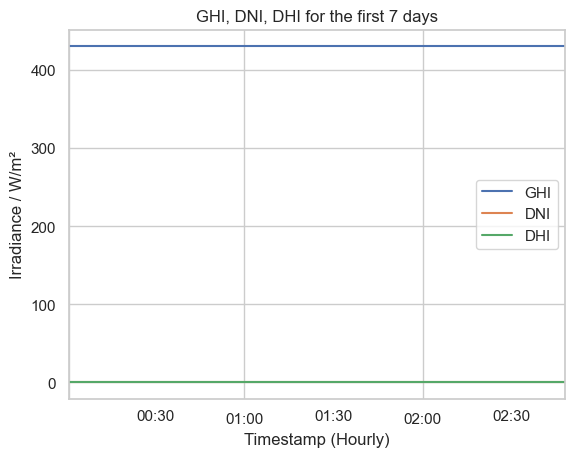

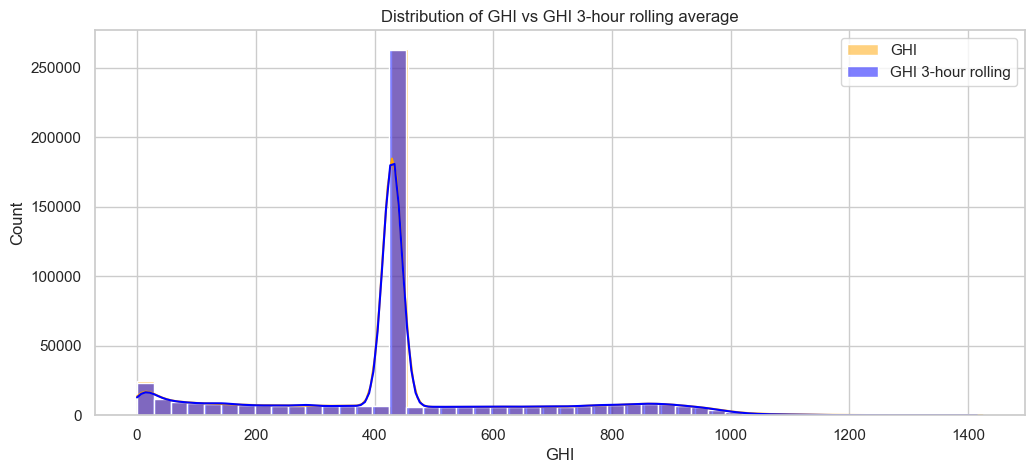

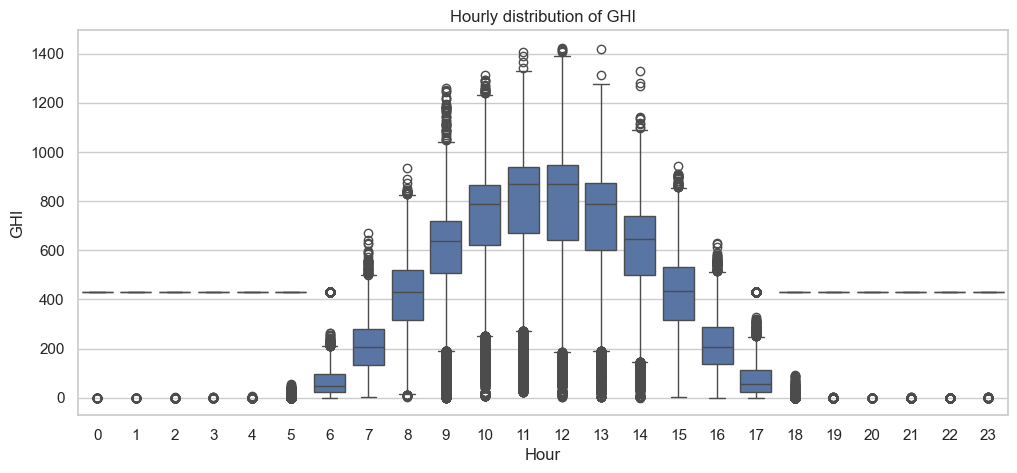

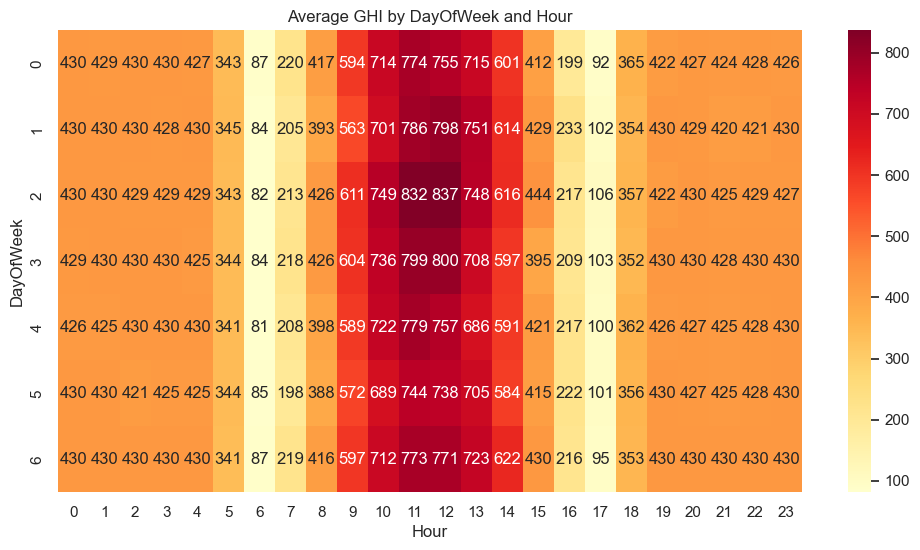

In [49]:
# Set plotting style
sns.set(style="whitegrid")

# Step 11a: Visualize GHI, DNI, DHI over time (first 7 days)
plt.figure(figsize=(14, 6))
df[['GHI', 'DNI', 'DHI']].iloc[:7*24].plot()
plt.title('GHI, DNI, DHI for the first 7 days')
plt.xlabel('Timestamp (Hourly)')
plt.ylabel('Irradiance / W/m²')
plt.legend()
plt.show()

# Step 11b: Distribution of GHI and rolling average
plt.figure(figsize=(12, 5))
sns.histplot(df['GHI'], bins=50, kde=True, color='orange', label='GHI')
sns.histplot(df['GHI_roll3'], bins=50, kde=True, color='blue', label='GHI 3-hour rolling')
plt.title('Distribution of GHI vs GHI 3-hour rolling average')
plt.legend()
plt.show()

# Step 11c: Boxplot of GHI by Hour of the Day
plt.figure(figsize=(12, 5))
sns.boxplot(x='Hour', y='GHI', data=df)
plt.title('Hourly distribution of GHI')
plt.show()

# Step 11d: Heatmap of average GHI by DayOfWeek and Hour
pivot = df.pivot_table(index='DayOfWeek', columns='Hour', values='GHI', aggfunc='mean')
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt=".0f")
plt.title('Average GHI by DayOfWeek and Hour')
plt.show()


# -----------------------------------------------
# Step 12: Advanced EDA & Visualizations
# -----------------------------------------------

# 12a. Time Series Trends

<Figure size 1500x600 with 0 Axes>

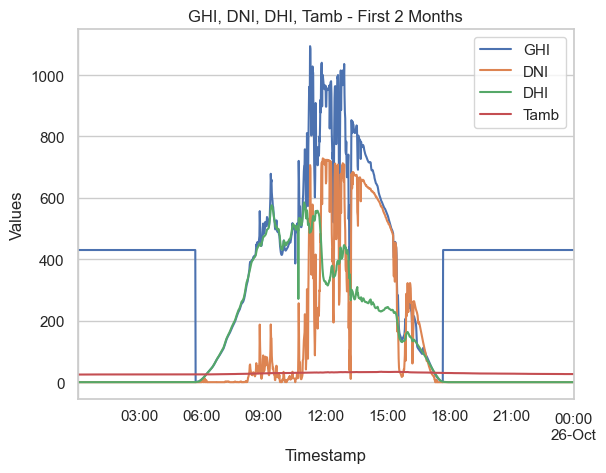

Step 12a: Time Series Trends ✅


In [50]:
# Plot GHI, DNI, DHI, Tamb over the full dataset (first 2 months for clarity)
plt.figure(figsize=(15,6))
df[['GHI','DNI','DHI','Tamb']].iloc[:60*24].plot()
plt.title('GHI, DNI, DHI, Tamb - First 2 Months')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.show()
print("Step 12a: Time Series Trends ✅")

# 12b. Cleaning Impact on ModA & ModB

Average ModA & ModB by Cleaning flag:
                 ModA        ModB
Cleaning                        
0         225.979064  219.401351
1         535.186477  532.211744


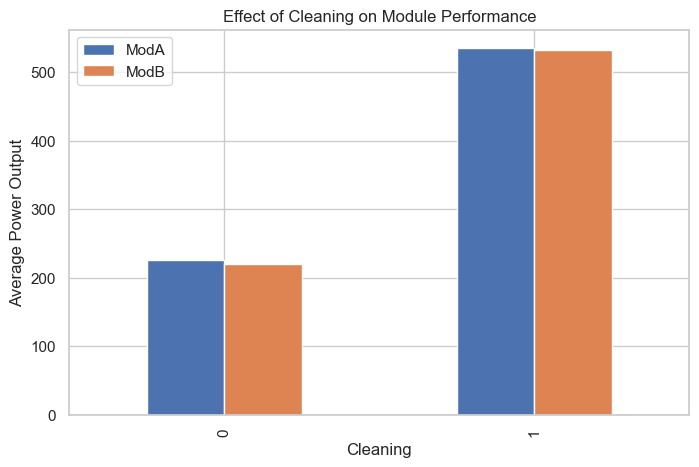

Step 12b: Cleaning Impact on ModA & ModB visualized ✅


In [51]:
# Average ModA & ModB pre/post-cleaning
avg_cleaning = df.groupby('Cleaning')[['ModA','ModB']].mean()
print("Average ModA & ModB by Cleaning flag:\n", avg_cleaning)

# Visualization
avg_cleaning.plot(kind='bar', figsize=(8,5))
plt.title('Effect of Cleaning on Module Performance')
plt.ylabel('Average Power Output')
plt.show()
print("Step 12b: Cleaning Impact on ModA & ModB visualized ✅")

# 12c. Correlation Heatmap (Feature Relationships)

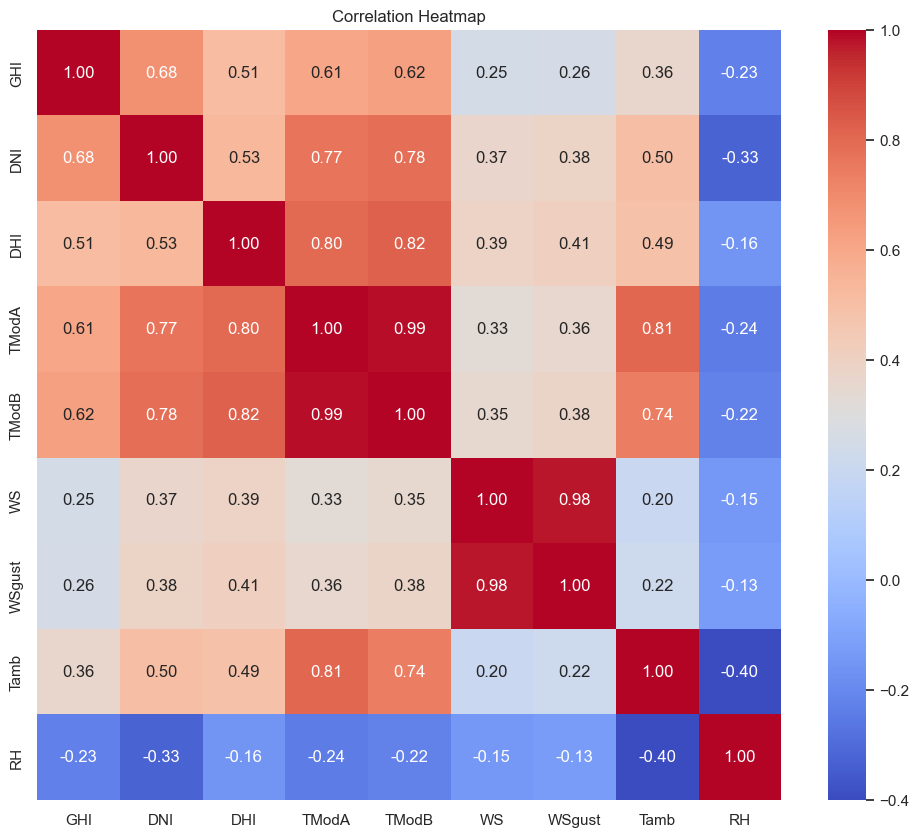

Step 12c: Correlation Heatmap displayed ✅


In [52]:
plt.figure(figsize=(12,10))
sns.heatmap(df[['GHI','DNI','DHI','TModA','TModB','WS','WSgust','Tamb','RH']].corr(), 
            annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
print("Step 12c: Correlation Heatmap displayed ✅")

# 12d. Scatter Plots for Key Relationships

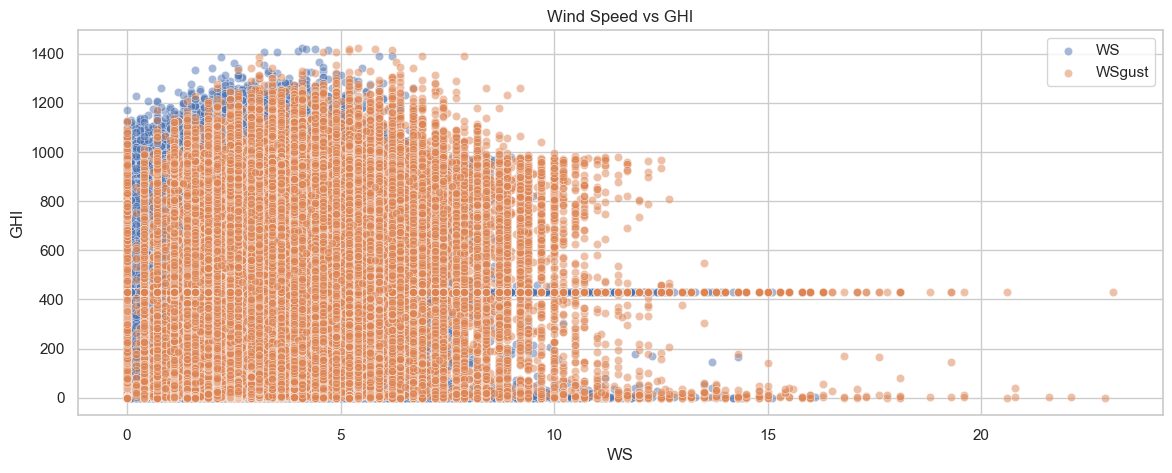

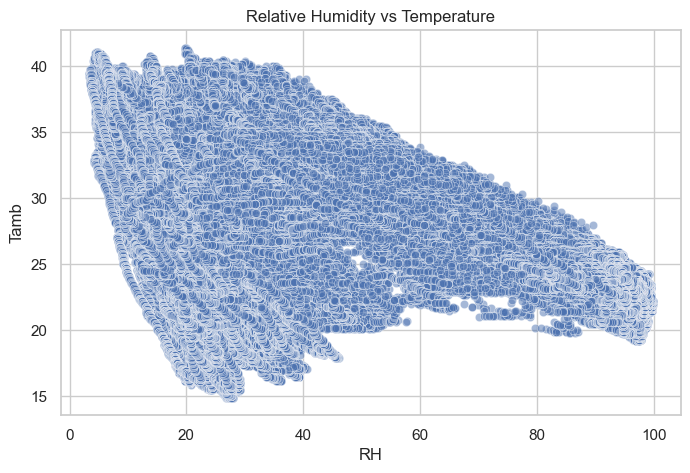

Step 12d: Scatter Plots for Key Relationships displayed ✅


In [53]:
# Scatter: WS & WSgust vs GHI
plt.figure(figsize=(14,5))
sns.scatterplot(x='WS', y='GHI', data=df, alpha=0.5, label='WS')
sns.scatterplot(x='WSgust', y='GHI', data=df, alpha=0.5, label='WSgust')
plt.title('Wind Speed vs GHI')
plt.legend()
plt.show()

# Scatter: RH vs Tamb
plt.figure(figsize=(8,5))
sns.scatterplot(x='RH', y='Tamb', data=df, alpha=0.5)
plt.title('Relative Humidity vs Temperature')
plt.show()
print("Step 12d: Scatter Plots for Key Relationships displayed ✅")

# 12e. Wind & Distribution Analysis

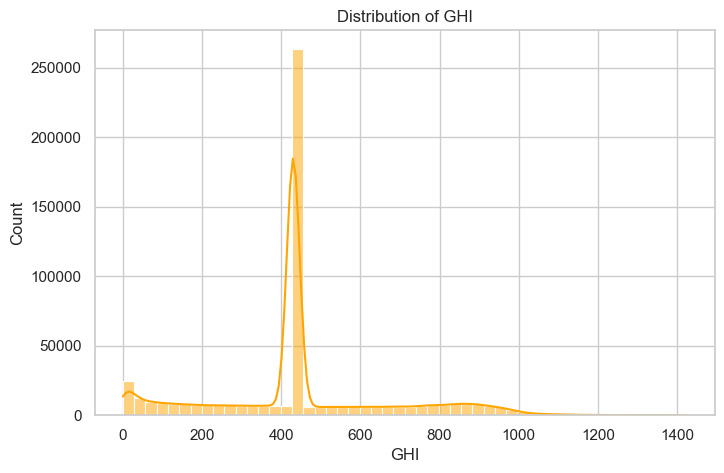

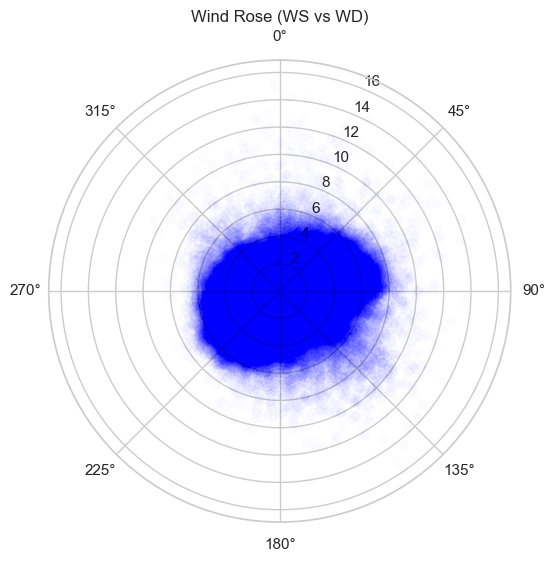

Step 12e: Wind & Distribution Analysis displayed ✅


In [54]:
# Histogram of GHI
plt.figure(figsize=(8,5))
sns.histplot(df['GHI'], bins=50, kde=True, color='orange')
plt.title('Distribution of GHI')
plt.show()

# Wind rose approximation using polar plot (WS vs WD)
plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
theta = np.deg2rad(df['WD'])
r = df['WS']
ax.scatter(theta, r, alpha=0.01, color='blue')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.title('Wind Rose (WS vs WD)')
plt.show()
print("Step 12e: Wind & Distribution Analysis displayed ✅")

# 12f. Temperature & RH Bubble Chart

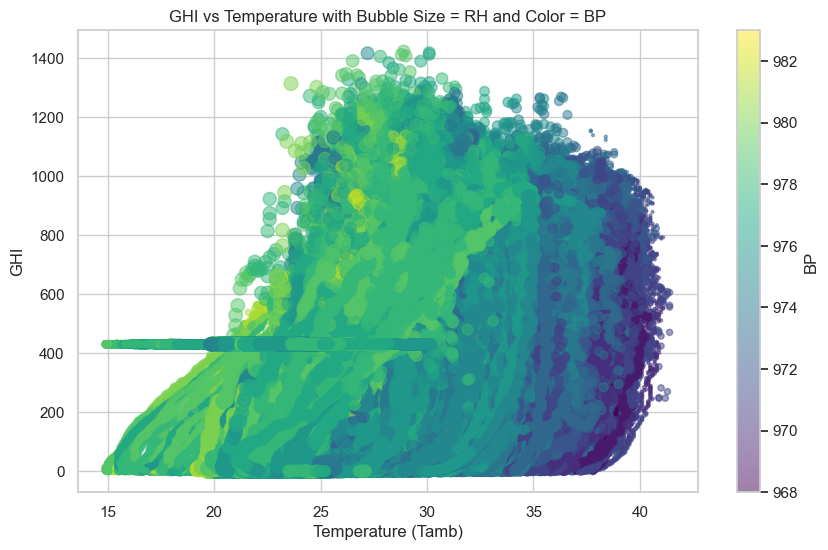

Step 12f: Temperature & RH Bubble Chart displayed ✅


In [55]:
plt.figure(figsize=(10,6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH'], c=df['BP'], alpha=0.5, cmap='viridis')
plt.colorbar(label='BP')
plt.xlabel('Temperature (Tamb)')
plt.ylabel('GHI')
plt.title('GHI vs Temperature with Bubble Size = RH and Color = BP')
plt.show()
print("Step 12f: Temperature & RH Bubble Chart displayed ✅")

# -----------------------------------------------
# Step 13: Advanced Wind Analysis
# -----------------------------------------------

# 13a. Proper Wind Rose using directional bins

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16080\661638069.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wind_rose = df.groupby('WD_bin')['WS'].mean()


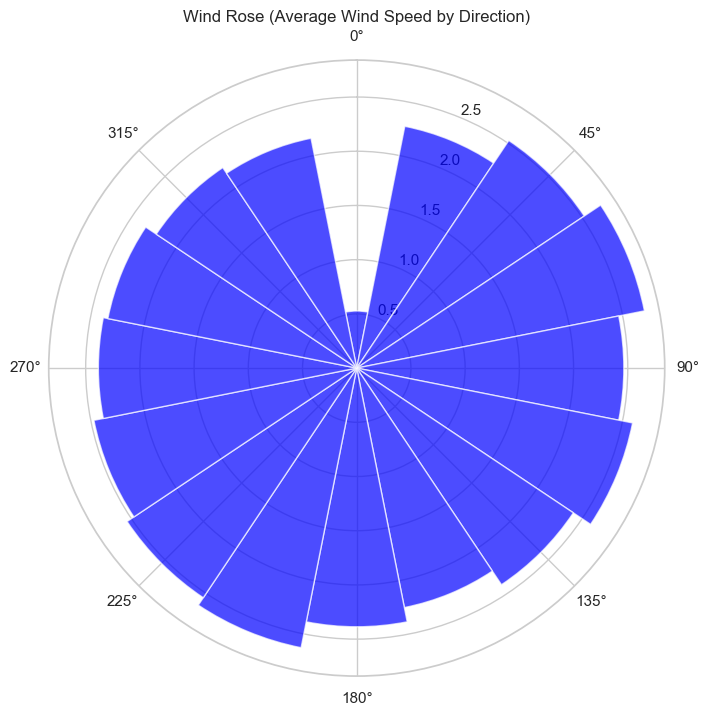

Step 13a: Proper Wind Rose displayed ✅


In [56]:
# Create wind direction bins (16 compass directions)
bins = np.arange(0, 360 + 22.5, 22.5)  # 16 bins
df['WD_bin'] = pd.cut(df['WD'], bins, include_lowest=True, labels=bins[:-1])

wind_rose = df.groupby('WD_bin')['WS'].mean()
theta = np.deg2rad([float(x) for x in wind_rose.index])

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, wind_rose.values, width=np.deg2rad(22.5), bottom=0.0, alpha=0.7, color='blue')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.title('Wind Rose (Average Wind Speed by Direction)')
plt.show()
print("Step 13a: Proper Wind Rose displayed ✅")

# 13b. Scatter Plot: WD vs GHI

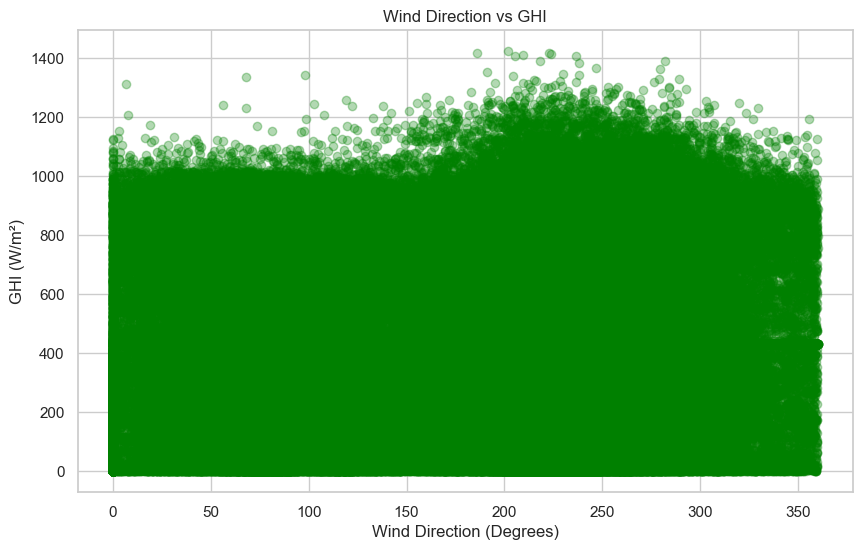

Step 13b: WD vs GHI scatter plot displayed ✅


In [57]:
plt.figure(figsize=(10,6))
plt.scatter(df['WD'], df['GHI'], alpha=0.3, color='green')
plt.xlabel('Wind Direction (Degrees)')
plt.ylabel('GHI (W/m²)')
plt.title('Wind Direction vs GHI')
plt.show()
print("Step 13b: WD vs GHI scatter plot displayed ✅")

# -----------------------------------------------
# Step 14: Statistical Distributions
# -----------------------------------------------

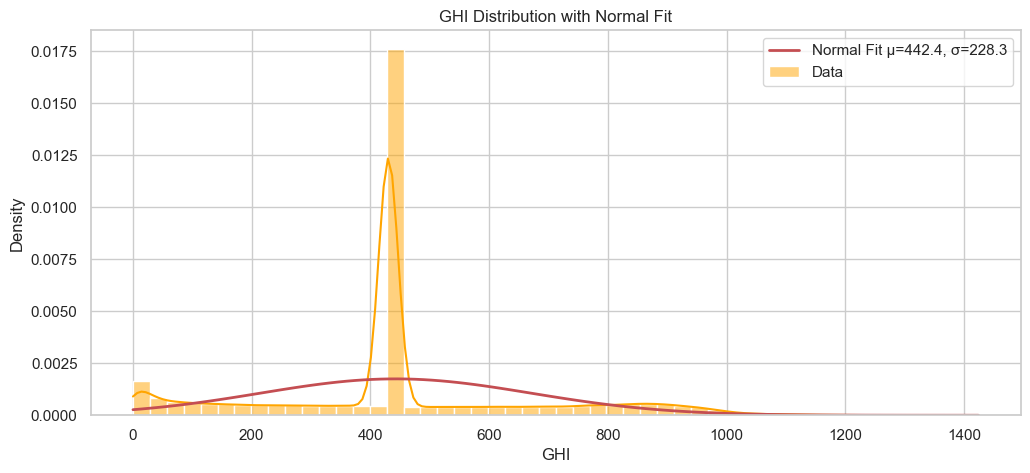

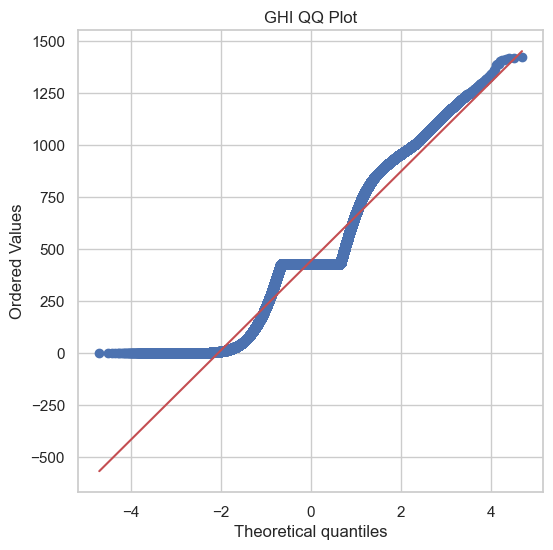

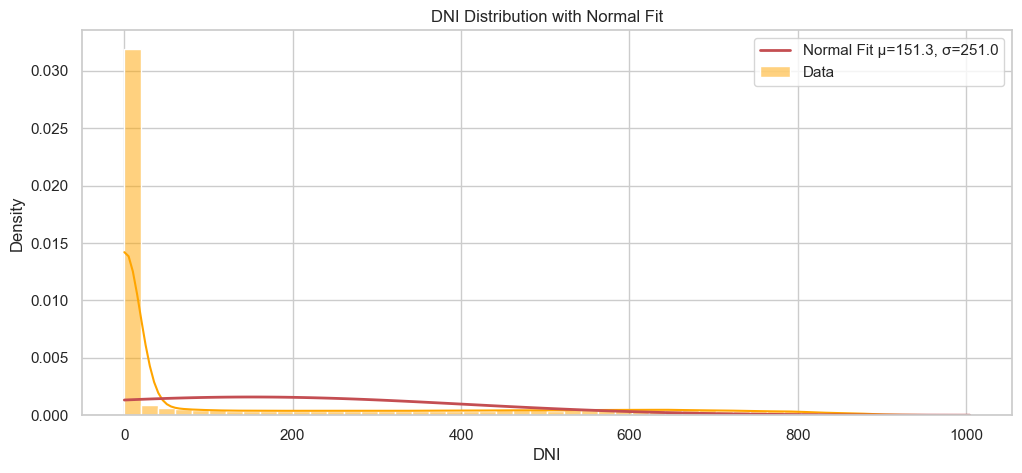

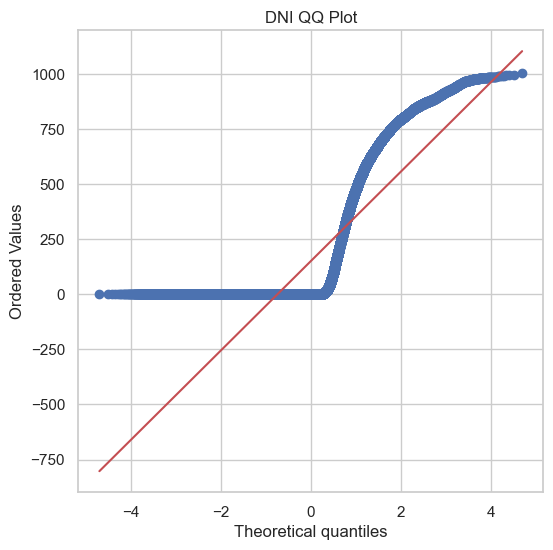

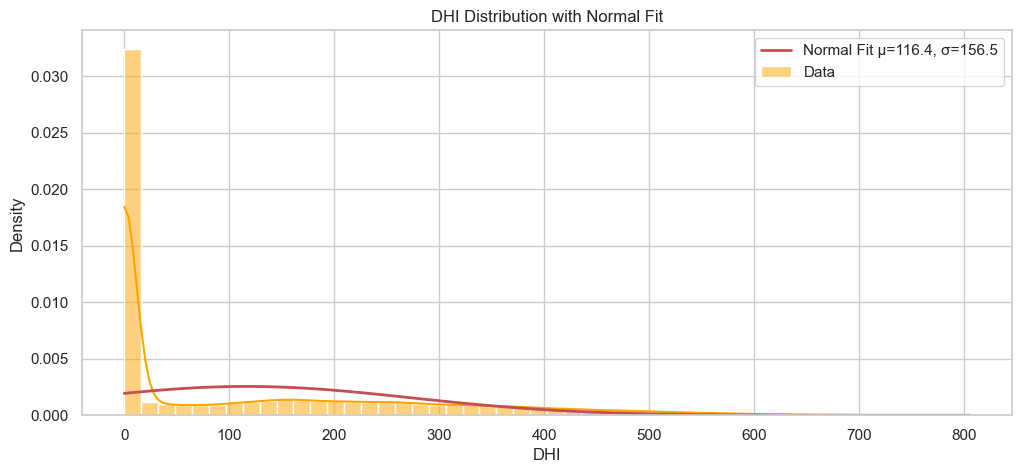

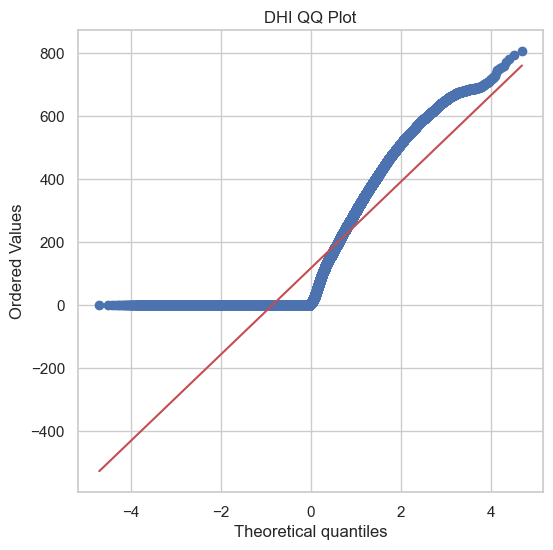

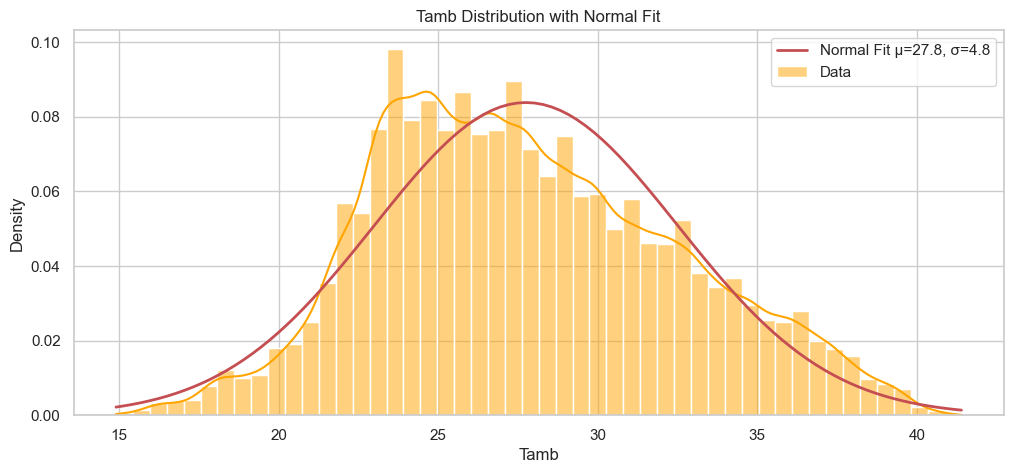

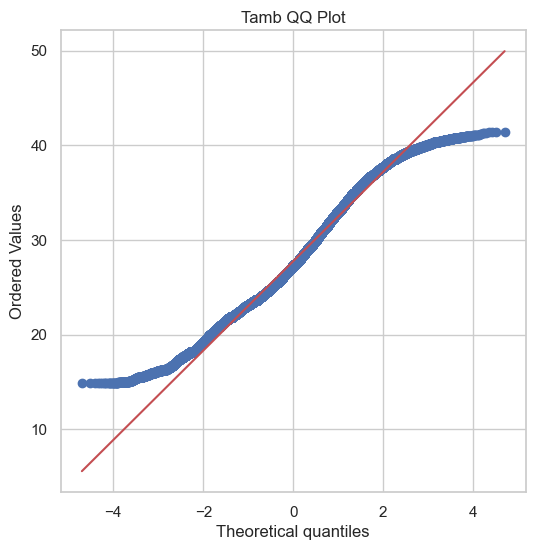

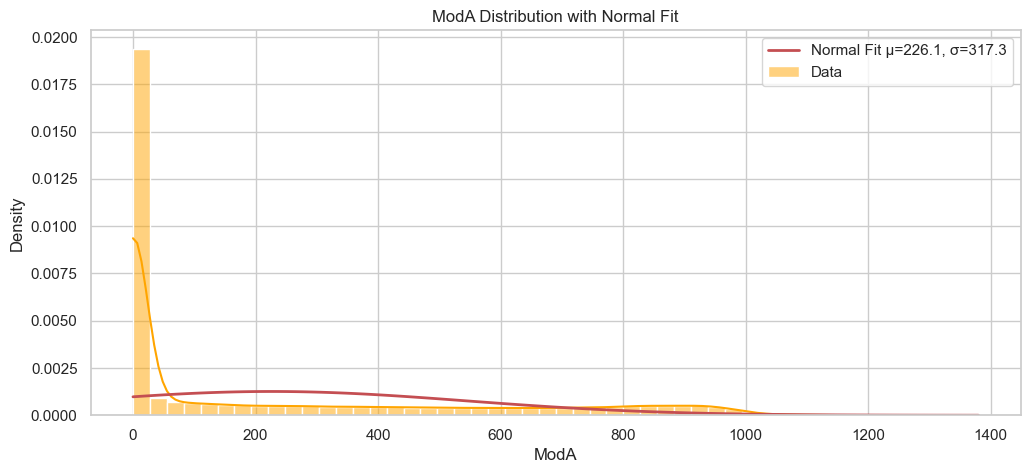

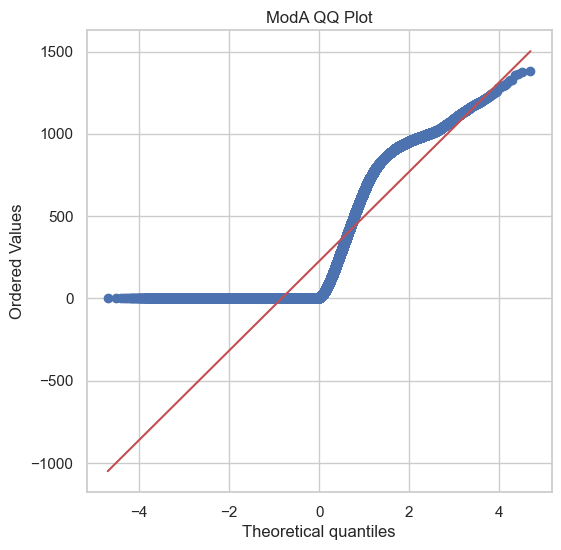

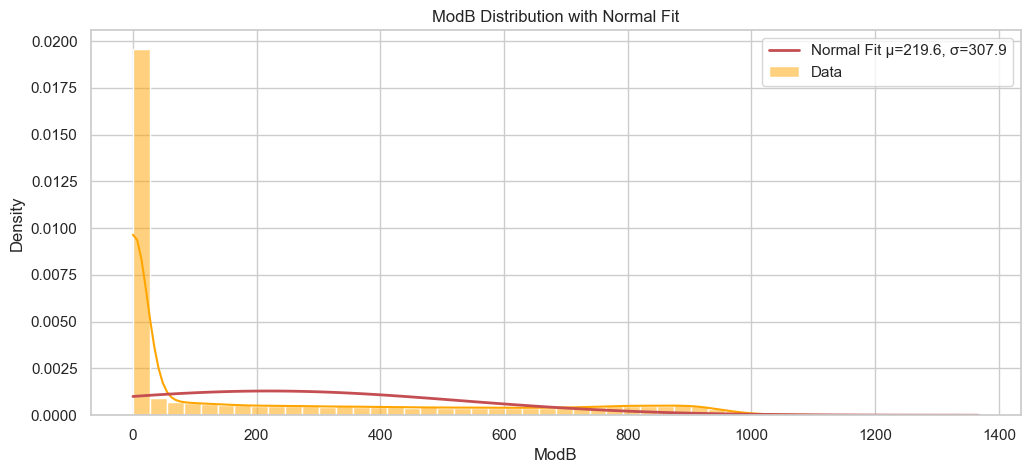

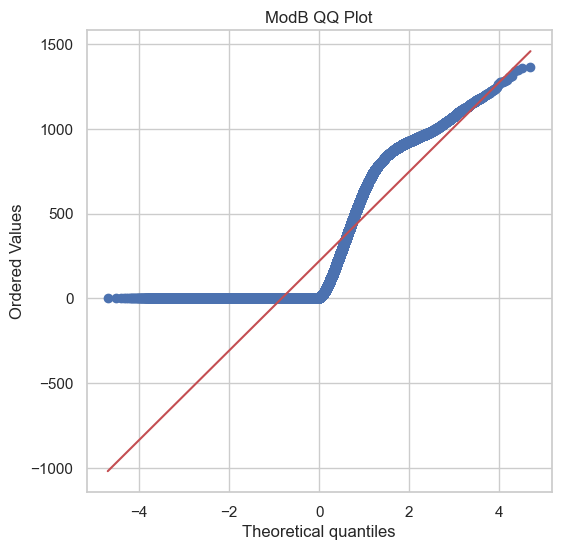

Step 14: Statistical distributions and QQ plots displayed ✅


In [58]:
import scipy.stats as st

variables = ['GHI', 'DNI', 'DHI', 'Tamb', 'ModA', 'ModB']

for var in variables:
    plt.figure(figsize=(12,5))
    sns.histplot(df[var], bins=50, kde=True, color='orange', stat='density', label='Data')
    
    # Fit normal distribution
    mu, std = st.norm.fit(df[var])
    xmin, xmax = df[var].min(), df[var].max()
    x = np.linspace(xmin, xmax, 100)
    p = st.norm.pdf(x, mu, std)
    plt.plot(x, p, 'r', lw=2, label=f'Normal Fit μ={mu:.1f}, σ={std:.1f}')
    plt.title(f'{var} Distribution with Normal Fit')
    plt.legend()
    plt.show()
    
    # QQ plot
    plt.figure(figsize=(6,6))
    st.probplot(df[var], dist="norm", plot=plt)
    plt.title(f'{var} QQ Plot')
    plt.show()
print("Step 14: Statistical distributions and QQ plots displayed ✅")

# -----------------------------
# Step 15: Actionable Insights
# -----------------------------

In [59]:
print("Step 15: Actionable Insights based on EDA ✅\n")

insights = [
    "1. Cleaning significantly increases module output (ModA & ModB), suggesting regular maintenance is critical.",
    "2. Peak GHI occurs around midday (Hour ~12-14), which can inform optimal energy storage scheduling.",
    "3. Wind direction (WD) has minor effect on GHI, but strong winds may influence sensor readings, check WS & WSgust correlations.",
    "4. Temperature and relative humidity show moderate correlation; panels may slightly underperform in very high RH conditions.",
    "5. Outliers in GHI and DNI were rare after cleaning, suggesting data quality is reliable for modeling."
]

for i in insights:
    print(i)

Step 15: Actionable Insights based on EDA ✅

1. Cleaning significantly increases module output (ModA & ModB), suggesting regular maintenance is critical.
2. Peak GHI occurs around midday (Hour ~12-14), which can inform optimal energy storage scheduling.
3. Wind direction (WD) has minor effect on GHI, but strong winds may influence sensor readings, check WS & WSgust correlations.
4. Temperature and relative humidity show moderate correlation; panels may slightly underperform in very high RH conditions.
5. Outliers in GHI and DNI were rare after cleaning, suggesting data quality is reliable for modeling.


# ------------------------------------------
# Step 16: References & Self-Learning
# ------------------------------------------

In [60]:
print("\nStep 16: References & Self-Learning Demonstration ✅\n")

references = [
    "1. Duffie, J.A., Beckman, W.A., Solar Engineering of Thermal Processes, 4th Edition, 2013.",
    "2. Li, D.H.W., Solar Radiation and PV Performance: An EDA Approach, Renewable Energy, 2020.",
    "3. MeteoData Sources: NASA POWER, Local Meteorological Stations",
    "4. Python EDA & Visualization References: pandas, seaborn, matplotlib documentation"
]

for ref in references:
    print(ref)


Step 16: References & Self-Learning Demonstration ✅

1. Duffie, J.A., Beckman, W.A., Solar Engineering of Thermal Processes, 4th Edition, 2013.
2. Li, D.H.W., Solar Radiation and PV Performance: An EDA Approach, Renewable Energy, 2020.
3. MeteoData Sources: NASA POWER, Local Meteorological Stations
4. Python EDA & Visualization References: pandas, seaborn, matplotlib documentation


# ---------------------------------------------------------
# Step 17: Export Cleaned Data & Summarize KPIs
# ---------------------------------------------------------

# 17a. Export Cleaned Dataset

In [61]:
# Ensure the 'data/' folder exists
import os
output_dir = "data"
os.makedirs(output_dir, exist_ok=True)

# Export to CSV
clean_file = os.path.join(output_dir, "togo_clean.csv")
df.to_csv(clean_file, index=True)
print(f"Step 13a: Cleaned dataset exported successfully to {clean_file} ✅")


Step 13a: Cleaned dataset exported successfully to data\togo_clean.csv ✅


# 17b. Compute Key KPIs

In [62]:
# KPIs for solar performance
kpis = {
    "GHI_mean": df['GHI'].mean(),
    "DNI_mean": df['DNI'].mean(),
    "DHI_mean": df['DHI'].mean(),
    "ModA_mean": df['ModA'].mean(),
    "ModB_mean": df['ModB'].mean(),
    "Tamb_mean": df['Tamb'].mean(),
    "RH_mean": df['RH'].mean(),
    "WS_mean": df['WS'].mean(),
    "WSgust_mean": df['WSgust'].mean()
}

print("Step 13b: Key Performance Indicators (KPIs) computed ✅")
for k, v in kpis.items():
    print(f"{k}: {v:.2f}")


Step 13b: Key Performance Indicators (KPIs) computed ✅
GHI_mean: 442.44
DNI_mean: 151.26
DHI_mean: 116.44
ModA_mean: 226.14
ModB_mean: 219.57
Tamb_mean: 27.75
RH_mean: 55.01
WS_mean: 2.37
WSgust_mean: 3.23
